In [2]:
import numpy as np

from data_loader import load_txt

from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid

from metrics import get_performance_measure, print_metric_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Not k-fold

## SVM

In [4]:
print('dataset 1')
X_train, X_test, y_train, y_test = load_txt(1) 
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

accuracy, precison, recall, f1, auc = get_performance_measure(y_test, y_pred, y_pred_proba[:, 1])
print_metric_score('SVM linear', accuracy, precison, recall, f1, auc)

clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

accuracy, precison, recall, f1, auc = get_performance_measure(y_test, y_pred, y_pred_proba[:, 1])
print_metric_score('SVM rbf', accuracy, precison, recall, f1, auc)

dataset 1
SVM linear
accuracy: 0.9736842105263158
precison: 0.9777777777777777
recall: 0.9565217391304348
f1: 0.967032967032967
auc: 0.9980818414322251
SVM rbf
accuracy: 0.9736842105263158
precison: 0.9777777777777777
recall: 0.9565217391304348
f1: 0.967032967032967
auc: 0.9980818414322251


In [5]:
print('dataset 2')
X_train, X_test, y_train, y_test = load_txt(2) 
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

accuracy, precison, recall, f1, auc = get_performance_measure(y_test, y_pred, y_pred_proba[:, 1])
print_metric_score('SVM linear', accuracy, precison, recall, f1, auc)

clf = SVC(kernel='rbf', probability=True, gamma=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

accuracy, precison, recall, f1, auc = get_performance_measure(y_test, y_pred, y_pred_proba[:, 1])
print_metric_score('SVM rbf', accuracy, precison, recall, f1, auc)

dataset 2
SVM linear
accuracy: 0.7311827956989247
precison: 0.5151515151515151
recall: 0.6538461538461539
f1: 0.576271186440678
auc: 0.7933409873708381
SVM rbf
accuracy: 0.7956989247311828
precison: 0.64
recall: 0.6153846153846154
f1: 0.6274509803921569
auc: 0.8005166475315728


## Random Forest

In [3]:
print('dataset 1')
X_train, X_test, y_train, y_test = load_txt(1) 
clf = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

accuracy, precison, recall, f1, auc = get_performance_measure(y_test, y_pred, y_pred_proba[:, 1])
print_metric_score('random forest', accuracy, precison, recall, f1, auc)

print('dataset 2')
X_train, X_test, y_train, y_test = load_txt(2) 
clf = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

accuracy, precison, recall, f1, auc = get_performance_measure(y_test, y_pred, y_pred_proba[:, 1])
print_metric_score('random forest', accuracy, precison, recall, f1, auc)

dataset 1
random forest
accuracy: 0.956140350877193
precison: 0.9183673469387755
recall: 0.9782608695652174
f1: 0.9473684210526316
auc: 0.9945652173913043
dataset 2
random forest
accuracy: 0.6881720430107527
precison: 0.43478260869565216
recall: 0.38461538461538464
f1: 0.40816326530612246
auc: 0.7422502870264065


# k-fold

In [3]:
def my_cross_val_score(clf, X_train, y_train, cv):
    # print('here')
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    accs = [] 
    precs = [] 
    recs = [] 
    f1s = [] 
    rocs = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        clf.fit(X_train_fold, y_train_fold)  
        y_pred = clf.predict(X_val_fold)  
        y_pred_proba = clf.predict_proba(X_val_fold)

        accuracy, precison, recall, f1, roc = get_performance_measure(y_val_fold, y_pred, y_pred_proba[:, 1])
        # print(f1)

        accs.append(accuracy)
        precs.append(precison)
        recs.append(recall)
        f1s.append(f1)
        rocs.append(roc)

    return clf, accs, precs, recs, f1s, rocs

### way 1

In [4]:
k = 10

print('dataset 1')
X_train, X_test, y_train, y_test = load_txt(1) 
clf = SVC(kernel='linear', probability=True)

# Perform 5-fold cross-validation and print the results
accs = cross_val_score(clf, X_train, y_train, cv=k, scoring='accuracy')
print("Accuracys for each fold:", accs)
print("Average accuracy (val):", accs.mean())
print('------------------------')

rocs = cross_val_score(clf, X_train, y_train, cv=k, scoring='roc_auc')
print("Rocs for each fold:", rocs)
print("Average roc score (val):", rocs.mean())

clf.fit(X_train, y_train)  # Train the model on the entire training data
y_test_pred = clf.predict(X_test)  # Predict on the test data
y_test_pred_proba = clf.predict_proba(X_test)

acc = accuracy_score(y_test, y_test_pred)
roc = roc_auc_score(y_test, y_test_pred_proba[:, 1])

print("accuracy (test):", acc)
print("roc score (test):", roc)

dataset 1
dataset 1
Accuracys for each fold: [0.95652174 1.         0.97826087 0.95652174 0.97826087 0.95555556
 0.93333333 1.         1.         0.97777778]
Average accuracy (val): 0.9736231884057972
------------------------
accuracy (test): 0.9736842105263158
roc score (test): 0.9980818414322251


### way 2 (using this)

In [ ]:
k = 10

print('dataset 1')
X_train, X_test, y_train, y_test = load_txt(1) 
clf = SVC(kernel='linear', probability=True)

# clf, X_train, y_train, cv
clf, accs, precs, recs, f1s, rocs = my_cross_val_score(clf, X_train, y_train, cv=k)
print("Accuracys for each fold:", accs)
print("Average accuracy (val):", np.array(accs).mean())
print('------------------------')

print("Rocs for each fold:", rocs)
print("Average roc score (val):", np.array(rocs).mean())

clf.fit(X_train, y_train)  # Train the model on the entire training data
y_test_pred = clf.predict(X_test)  # Predict on the test data
y_test_pred_proba = clf.predict_proba(X_test)

acc, prec, rec, f1, roc = get_performance_measure(y_test, y_test_pred, y_test_pred_proba[:, 1])

print("accuracy (test):", acc)
print("roc score (test):", roc)

In [3]:
# k = 10

# print('dataset 1')
# X_train, X_test, y_train, y_test = load_txt(1) 
# clf = SVC(kernel='linear', probability=True)

# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# accs = []
# rocs = []

# for train_index, val_index in kf.split(X_train):
#     X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#     clf.fit(X_train_fold, y_train_fold)  # Train the model on the training fold
#     y_pred = clf.predict(X_val_fold)  # Predict on the validation fold
#     y_pred_proba = clf.predict_proba(X_val_fold)

#     acc = accuracy_score(y_val_fold, y_pred)
#     accs.append(acc)

#     # print(y_val_fold.shape)
#     # print(y_pred_proba.shape)

#     roc = roc_auc_score(y_val_fold, y_pred_proba[:, 1])
#     rocs.append(roc)

# print("Accuracys for each fold:", accs)
# print("Average accuracy (val):", np.array(accs).mean())
# print('------------------------')

# print("Rocs for each fold:", rocs)
# print("Average roc score (val):", np.array(rocs).mean())

# clf.fit(X_train, y_train)  # Train the model on the entire training data
# y_test_pred = clf.predict(X_test)  # Predict on the test data
# y_test_pred_proba = clf.predict_proba(X_test)

# acc = accuracy_score(y_test, y_test_pred)
# roc = roc_auc_score(y_test, y_test_pred_proba[:, 1])

# print("accuracy (test):", acc)
# print("roc score (test):", roc)

dataset 1
dataset 1
Accuracys for each fold: [0.9782608695652174, 0.9565217391304348, 0.9782608695652174, 0.9782608695652174, 0.9782608695652174, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9333333333333333, 0.9555555555555556]
Average accuracy (val): 0.9714009661835747
------------------------
Rocs for each fold: [1.0, 0.993006993006993, 0.996031746031746, 1.0, 1.0, 1.0, 0.9919028340080971, 1.0, 0.9588477366255144, 0.9907834101382489]
Average roc score (val): 0.99305727198106
accuracy (test): 0.9736842105263158
roc score (test): 0.9980818414322251


### Hyper-parameter Tuning

In [8]:
k = 10

X_train, X_test, y_train, y_test = load_txt(2) 
parameters = {'kernel':('linear', 'poly', 'rbf'),
              'C':[0.1, 1, 10, 100],
              'gamma': [0.1, 0.001, 0.0001]}

grid = ParameterGrid(parameters)

best_acc = -999999
best_prec = -999999
best_rec = -999999
best_f1 = -999999
best_roc = -999999
best_params = {}
best_clf = 0

counter = 1
for params in grid:
  print(str(counter) + '  ', end="")
  if counter % 32 == 0:
    print()
  counter = counter + 1

  clf = SVC(kernel=params['kernel'], C=params['C'], gamma=params['gamma'], probability=True)

  clf, accs, precs, recs, f1s, rocs = my_cross_val_score(clf, X_train, y_train, cv=k)
  # print("Accuracys for each fold:", accs)
  # print("Average accuracy (val):", np.array(accs).mean())
  # print('------------------------')

  # print("Rocs for each fold:", rocs)
  # print("Average roc score (val):", np.array(rocs).mean())

  clf.fit(X_train, y_train)  # Train the model on the entire training data
  y_train_pred = clf.predict(X_train)  # Predict on the test data
  y_train_pred_proba = clf.predict_proba(X_train)

  acc, prec, rec, f1, roc = get_performance_measure(y_train, y_train_pred, y_train_pred_proba[:, 1])

  if acc > best_acc:
    best_acc = acc
    best_prec = prec
    best_rec = rec
    best_f1 = f1
    best_roc = roc

    best_params = params
    best_clf = clf

print()

y_test_pred = best_clf.predict(X_test)  # Predict on the test data
y_test_pred_proba = clf.predict_proba(X_test)
test_acc, test_prec, test_rec, test_f1, test_roc = get_performance_measure(y_test, y_test_pred, y_test_pred_proba[:, 1])

print('best parameters:', best_params)
print('test accuracy:', test_acc)
print('test precision:', test_prec)
print('test recall:', test_rec)
print('test f1 score:', test_f1)
print('test auroc score:', test_roc)

dataset 2
1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  
33  34  35  36  
best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
test accuracy: 0.7634408602150538
test precision: 0.5833333333333334
test recall: 0.5384615384615384
test f1 score: 0.5599999999999999
test auroc score: 0.7629161882893226


### bias-variance analysis

#### Kernel Analysis

In [4]:
k = 10

def check_kernel_effect(dataset_no):
  X_train, X_test, y_train, y_test = load_txt(dataset_no) 
  parameters = {'kernel':('linear', 'poly', 'rbf')}
  grid = ParameterGrid(parameters)

  counter = 1
  for params in grid:
    print(str(counter) + '  ', end="")
    if counter % 32 == 0:
      print()
    counter = counter + 1
    # if counter == 3:
    #   break
    # print(type(params))
    # print(params)
    clf = SVC(kernel=params['kernel'], probability=True)
    accs = cross_val_score(clf, X_train, y_train, cv=k, scoring='accuracy')

    clf.fit(X_train, y_train)

    y_pred_test = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    print('Parameters:',clf.get_params,end='\n')
    print('test accuracy', test_acc)
    print()

dataset_no = 1
check_kernel_effect(dataset_no)

dataset_no = 2
check_kernel_effect(dataset_no)


NameError: name 'X_train' is not defined

#### Effect of C

dataset 1
1  Parameters: <bound method BaseEstimator.get_params of SVC(C=0.01, probability=True)>
test accuracy 0.6403508771929824

2  Parameters: <bound method BaseEstimator.get_params of SVC(C=0.1, probability=True)>
test accuracy 0.9210526315789473

3  Parameters: <bound method BaseEstimator.get_params of SVC(C=1, probability=True)>
test accuracy 0.9736842105263158

4  Parameters: <bound method BaseEstimator.get_params of SVC(C=3, probability=True)>
test accuracy 0.9736842105263158

5  Parameters: <bound method BaseEstimator.get_params of SVC(C=10, probability=True)>
test accuracy 0.9736842105263158

6  Parameters: <bound method BaseEstimator.get_params of SVC(C=100, probability=True)>
test accuracy 0.9649122807017544

/u/epw9kz/academic/first_year/ML/project/notebooks/plots/svm_C_data1.png
dataset 2
1  Parameters: <bound method BaseEstimator.get_params of SVC(C=0.01, probability=True)>
test accuracy 0.7204301075268817

2  Parameters: <bound method BaseEstimator.get_params of SVC(C=

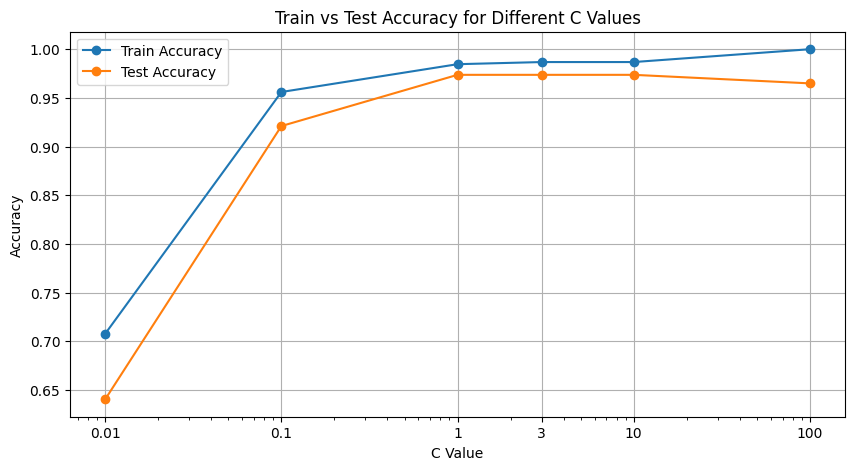

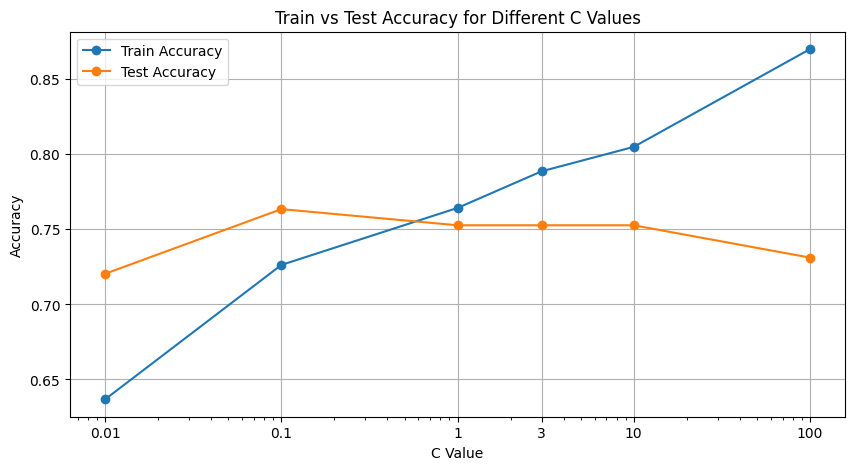

In [9]:
def check_C_effect(dataset_no):
    X_train, X_test, y_train, y_test = load_txt(dataset_no) 
    C_list = [0.01, 0.1, 1, 3, 10, 100]
    parameters = {'C':C_list}

    grid = ParameterGrid(parameters)
    train_accs = []
    test_accs = []

    counter = 1
    for params in grid:
        print(str(counter) + '  ', end="")
        if counter % 32 == 0:
            print()
        counter = counter + 1
        # if counter == 3:
        #   break
        # print(type(params))
        # print(params)
        clf = SVC(C=params['C'], probability=True)
        accs = cross_val_score(clf, X_train, y_train, cv=k, scoring='accuracy')

        clf.fit(X_train, y_train)
        
        y_pred_train = clf.predict(X_train)
        train_acc = accuracy_score(y_train, y_pred_train)
        train_accs.append(train_acc)

        y_pred_test = clf.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred_test)
        print('Parameters:',clf.get_params,end='\n')
        print('test accuracy', test_acc)
        test_accs.append(test_acc)
        print()

    # Plotting both sets of accuracies in one graph
    plt.figure(figsize=(10, 5))
    plt.plot(C_list, train_accs, label='Train Accuracy', marker='o')
    plt.plot(C_list, test_accs, label='Test Accuracy', marker='o')

    # Setting the logarithmic scale for x-axis
    plt.xscale('log')

    # Adding titles and labels
    plt.title('Train vs Test Accuracy for Different C Values')
    plt.xlabel('C Value')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.xticks(ticks=C_list, labels=C_list)
    plt.legend()

    # plt.show()
# -----------------------------------------
    # plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    # plt.plot(C_list, test_accs, marker='o', linestyle='-')
    # plt.xscale('log')  # Use a logarithmic scale for the x-axis if your C_list values are in a wide range

    # plt.title('Test Accuracy vs. C')
    # plt.xlabel('C Values')
    # plt.ylabel('Test Accuracy')
    # plt.grid(True)
    # plt.xticks(ticks=C_list, labels=C_list)

    img_filename = '/u/epw9kz/academic/first_year/ML/project/notebooks/plots/svm_C_data' + str(dataset_no) + '.png'
    print(img_filename)
    plt.savefig(img_filename, dpi=300, bbox_inches='tight')  # Saves the plot as a PNG file
    # plt.show()

dataset_no = 1
check_C_effect(dataset_no)

dataset_no = 2 
check_C_effect(dataset_no)
print('done!')

dataset 1
1  Parameters: <bound method BaseEstimator.get_params of SVC(C=0.01, probability=True)>
test accuracy 0.6403508771929824

2  Parameters: <bound method BaseEstimator.get_params of SVC(C=0.1, probability=True)>
test accuracy 0.9210526315789473

3  Parameters: <bound method BaseEstimator.get_params of SVC(C=1, probability=True)>
test accuracy 0.9736842105263158

4  Parameters: <bound method BaseEstimator.get_params of SVC(C=3, probability=True)>
test accuracy 0.9736842105263158

5  Parameters: <bound method BaseEstimator.get_params of SVC(C=10, probability=True)>
test accuracy 0.9736842105263158

6  Parameters: <bound method BaseEstimator.get_params of SVC(C=100, probability=True)>
test accuracy 0.9649122807017544



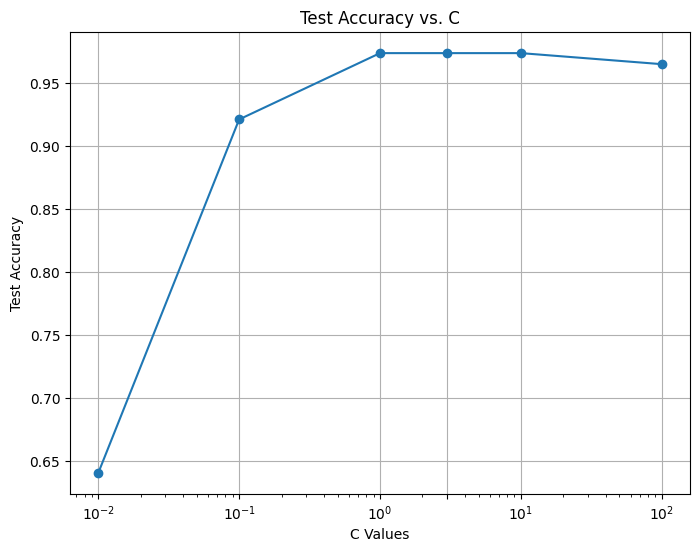

In [15]:
# X_train, X_test, y_train, y_test = load_txt(1) 
# C_list = [0.01, 0.1, 1, 3, 10, 100]
# parameters = {'C':C_list}

# grid = ParameterGrid(parameters)
# test_accs = []

# counter = 1
# for params in grid:
#   print(str(counter) + '  ', end="")
#   if counter % 32 == 0:
#     print()
#   counter = counter + 1
#   # if counter == 3:
#   #   break
#   # print(type(params))
#   # print(params)
#   clf = SVC(C=params['C'], probability=True)

#   clf.fit(X_train, y_train)

#   y_pred_test = clf.predict(X_test)
#   test_acc = accuracy_score(y_test, y_pred_test)
#   print('Parameters:',clf.get_params,end='\n')
#   print('test accuracy', test_acc)
#   test_accs.append(test_acc)
#   print()

# plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
# plt.plot(C_list, test_accs, marker='o', linestyle='-')
# plt.xscale('log')  # Use a logarithmic scale for the x-axis if your C_list values are in a wide range

# plt.title('Test Accuracy vs. C')
# plt.xlabel('C Values')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.xticks(C_list)  # Set x-tick values to match C_list

# plt.savefig('/u/epw9kz/academic/first_year/ML/project/notebooks/plots/svm_C_data1.png', dpi=300, bbox_inches='tight')  # Saves the plot as a PNG file
# plt.show()